---
title: "Train your first image classifier (AI) model!"
toc: true
image: "google_deepmind.jpg"
date: "2023-05-29"
description: "Get a taste of AI/deep learning with this simple tutorial that trains an image classifier model!"
---


## 1. Introduction

Want to get hands-on experience with AI? If so, this is the perfect tutorial for you!<br>
Pre-requisites for this tutorial:

- beginner-level python
- be able to use jupyter notebooks
- a Kaggle account (go create one duh)

That's all! If you don't know how to use Jupyter notebooks, click [here](https://www.kaggle.com/code/jhoward/jupyter-notebook-101) for a quick tutorial on both Jupyter notebooks and Kaggle.

So what exactly will we be creating in this tutorial? We are gonna train a Deep Learning model to identify if a given image is a CRT TV or a flat screen TV or a desktop monitor. We will be using a beginner friendly and widely used library called **fastai**. Sounds damn cool, at least to me :)

**Note 1**: You need not break your head over what each line of code does. This tutorial is meant to give you impetus to delve into Deep Learning and a top level overview of it's power :)  
**Note 2**: GPU needs to be enabled for this tutorial or you'll be spending hours training the model 😂. Specifically enable GPU P100. Also, to use GPUs you need to have your phone number verified, so go do that if you haven't yet.



## 2. Installing modules

Here, we will be installing/updating the python modules necessary for this tutorial.

Run the two following code blocks to do so.

In [3]:
import os
from fastcore.all import *
import urllib.request
from fastai.vision.all import *
from fastdownload import download_url

iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

from duckduckgo_search import ddg_images

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pandas-profiling 3.6.2 requires requests<2.29,>=2.24.0, but you have requests 2.31.0 which is incompatible.
librosa 0.10.0.post2 requires soundfile>=0.12.1, but you have soundfile 0.11.0 which is incompatible.
apache-beam 2.44.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.6 which is incompatible.



## 3. Glimpsing our data

What is AI without data? Data is arguably the most important thing in the field of AI/Data Science. AI models are trained using tons and tons of data. Let's have a look at how our data looks like.

In the first block, we search and retrieve one URL for an image of a flat screen TV.<br>
We then download the image from the retrieved URL and open the image and repeat the process for a CRT TV in the subsequent code blocks.

In [4]:
def search_images(term, max_images=40):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [5]:
urls = search_images('flat screen tv', max_images=1)
urls[0]

Searching for 'flat screen tv'


/opt/conda/lib/python3.7/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/opt/conda/lib/python3.7/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/opt/conda/lib/python3.7/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


'http://s4msungtelevision32.files.wordpress.com/2013/01/flat-screen-televisions.jpg'

In [8]:
dest = 'flatscreentv.jpg'
# Trying two libraries because they both are working erratically for me
# try:
#     download_url(urls[0], dest, show_progress=False)
#     print("hi")
# except:
urllib.request.urlretrieve(urls[0], dest)

('flatscreentv.jpg', <http.client.HTTPMessage at 0x7e8f7900d090>)

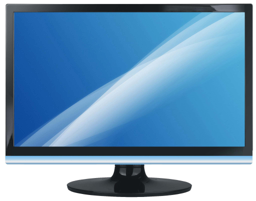

In [9]:
Image.open(dest).to_thumb(256, 256)

Searching for 'crt tv'


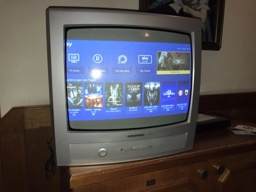

In [10]:
try:
    download_url(search_images('crt tv', max_images=1)[0], 'crttv.jpg', show_progress=False)
except:
    urllib.request.urlretrieve(search_images('crt tv', max_images=1)[0], 'crttv.jpg')

Image.open('crttv.jpg').to_thumb(256, 256)


## 4. Downloading images

Let us now download a bunch of images to train our model and make them ready to be "fed" into the model.

In [11]:
# Downloading images into their respective directories
searches = 'flat screen tv', 'crt tv', 'desktop monitor'
path = Path('tv_or_desktop')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(o))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'flat screen tv'
Searching for 'crt tv'
Searching for 'desktop monitor'


In [12]:
# Check and remove unopenable images
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

7

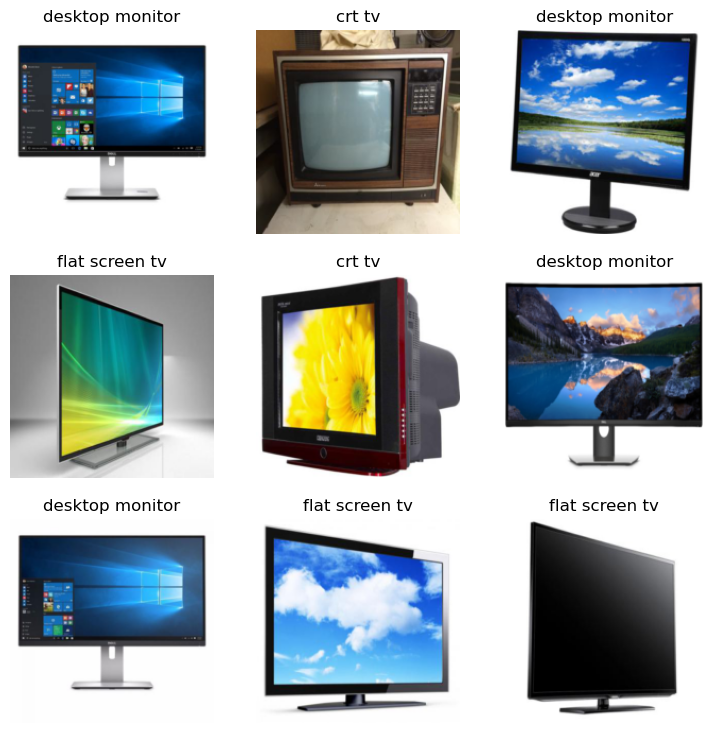

In [13]:
# Loading the data
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=9)


## 5. Training our model!

This is it people. 'tis time to train our model! For this example we use a model called ResNet18 with 18 layers. ResNet18 is pre-trained on ImageNet dataset. Therefore, we need not train it again, rather we fine tune it to recognize images from our dataset, i.e., flatscreen TV, CRT TV and desktop monitors.

In [14]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(5)

/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and may be removed in the future, "
/opt/conda/lib/python3.7/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.542415,1.480012,0.523810,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.913363,1.170745,0.476190,00:01
1,0.876068,0.878507,0.333333,00:01
2,0.637958,0.758396,0.238095,00:01
3,0.499402,0.701759,0.190476,00:01
4,0.409540,0.639917,0.190476,00:01


## 6. Classifying images

Congratulations! You have trained your first (ig 🤷) image classification model! Let us now put it to test and try classifying some images.

In [15]:
# Predicting an image we had downloaded earlier
learn.predict(PILImage.create('crttv.jpg'))

('crt tv', tensor(0), tensor([9.9726e-01, 5.5894e-04, 2.1807e-03]))

In [16]:
# Predicting an image we had downloaded earlier
learn.predict(PILImage.create('flatscreentv.jpg'))

('desktop monitor', tensor(1), tensor([6.4813e-04, 9.9257e-01, 6.7823e-03]))

Searching for 'desktop monitor'


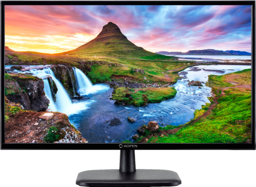

In [17]:
# download_url(search_images('desktop monitor', max_images=1)[0], dest='desktopmonitor.jpg', show_progress=False)
try:
    download_url(search_images('desktop monitor', max_images=1)[0], 'desktopmonitor.jpg', show_progress=False)
except:
    urllib.request.urlretrieve(search_images('desktop monitor', max_images=1)[0], 'desktopmonitor.jpg')

Image.open('desktopmonitor.jpg').to_thumb(256, 256)

In [18]:
learn.predict(PILImage.create('desktopmonitor.jpg'))

('desktop monitor', tensor(1), tensor([5.4398e-05, 9.9916e-01, 7.8518e-04]))

Well, that's not bad for our first model. It has a decent accuracy. For me, it got 2/3 predictions right.  
If you have any questions don't hesitate to message me on discord. And lastly, [here's](https://www.kaggle.com/code/suchitg04/tv-and-desktop-monitor-classifier-chap1-blog) the link to my notebook if you wannaplay around with it (click on the "copy and edit button").

Thank you for reading my blog. You can reach out to me through my socials here:

- Discord - LostSquid>.<#6436
- LinkedIn - /in/suchitg04/

I hope to see you soon. Until then 👋